<a href="https://colab.research.google.com/github/mugdha711/MLAP-Class/blob/master/2A)_Clustering_BASIC_K_MEANS_JUST_2_VARIABLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Clustering-- CUSTOMER CASE - ONLY BASIC K-MEANS**

In [1]:
import pandas as pd


In [3]:
customers_df = pd.read_csv('/content/Income Data.csv')

In [5]:
customers_df.head(5)

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


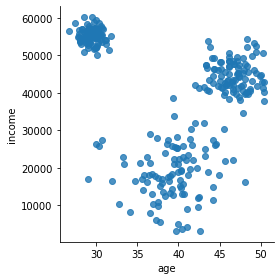

In [8]:
sn.lmplot('age', 'income', data=customers_df, fit_reg = False,
size = 4);

In [9]:
# Insights
#1. One on the top-left side of the graph, depicting low-age–high-income group.
#2. One on the top-right side of the graph, depicting high-age–medium-income group.
#3. One on the bottom of the graph, depicting a low-income group, which has an age spread from low to high.

#Distance Metrics
#Eucledian, minkowski, jacckard, cosine and gower's

##**K-Means Clustering**

In [10]:
#a non-hierarchical clustering method in which the number of clusters (K) is decided a priori
#The following steps are used in K-means clustering algorithm:
#1. Decide the value of K (which can be fine-tuned later).
#2. Choose K observations from the data that are likely to be in different clusters. There are many
#ways of choosing these initial K values; the easiest approach is to choose observations that are farthest (in one of the parameters of the data).
#3. The K observations selected in step 2 are the centroids of those clusters.
#4. For remaining observations, find the cluster closest to the centroid. Add the new observation (say
#observation j) to the cluster with the closest centroid. Adjust the centroid after adding a new observation to the cluster. The closest centroid is chosen based upon an appropriate distance measure.
#5. Repeat step 4 until all observations are assigned to a cluster

#We'll create 3 clusters due to above graph




In [11]:
from sklearn.cluster import KMeans
clusters = KMeans(3)
clusters.fit(customers_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
customers_df['clusterid'] = clusters.labels_
#clusters.labels_ contains labels that identify the cluster to which an observation belongs

In [14]:
customers_df[0:5]

,income,age,clusterid
0,41100.0,48.75,2
1,54100.0,28.10,0
2,47800.0,46.75,2
3,19100.0,40.25,1
4,18200.0,35.80,1


####Plotting Customers with Their Segments

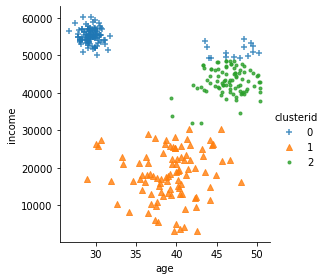

In [25]:
marker = ['+','^','.']
sn.lmplot('age', 'income',
  data = customers_df,
  hue = "clusterid",
  fit_reg = False,
  markers = marker,
  height = 4)

In [24]:
#Insights- before creating clusters, all features need to be normalized and brought to normalized scale as here several significant difference are not counted due to high income values

####Normalization

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_customers_df = scaler.fit_transform(customers_df[['age','income']])
scaled_customers_df[0:5]

array([[ 1.3701637 ,  0.09718548],
       [-1.3791283 ,  0.90602749],
       [ 1.10388844,  0.51405021],
       [ 0.23849387, -1.27162408],
       [-0.35396857, -1.32762083]])

####Plotting after normalization

In [28]:
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(scaled_customers_df)
customers_df['clusterid_new'] = clusters_new.labels_

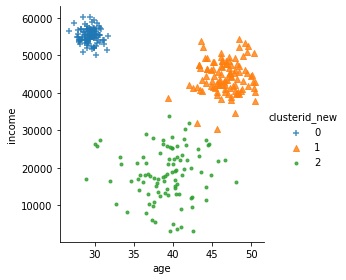

In [29]:
marker = ['+','^','.']
sn.lmplot('age', 'income',
  data = customers_df,
  hue = "clusterid_new",
  fit_reg = False,
  markers = marker,
  height = 4)

In [30]:
clusters.cluster_centers_ #give cluster centre values

array([[5.46756522e+04, 3.17004348e+01],
       [1.81447917e+04, 3.91744792e+01],
       [4.30539326e+04, 4.64191011e+01]])

####Cluster Centers and Interpreting the Clusters

In [35]:
# Insight - the cluster center provides the average age and average income of each cluster. The customer’s age and income will vary from the cluster centers and is called the cluster variance.

#customers_df.groupby('clusterid')['age','income'].agg(['mean','std']).reset_index()

In [34]:
customers_df.groupby('clusterid_new')['age','income'].agg(['mean','std']).reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


clusterid_new        age                  income             
                      mean       std          mean          std
0             0  29.384000  0.921458  55204.000000  1951.943864
1             1  46.627184  2.151559  44308.737864  4390.321503
2             2  39.140206  3.558665  18321.649485  6924.747691

INSIGHTS- CUSTOMER
The clusters can be interpreted as follows:
1. cluster0: Customers with mean age of 29 and income of 55k. Low age and high income.
2. cluster1: Customers with mean age of 39 and income of 18K. Mid age and low income.
3. cluster2: Customers with mean age of 47 and income of 44k. High age and medium income.